# Lab 1: The Apollo Missions

**Name:** Jamie Vásquez-Rojas

**Due Date:** March 9, 2025

**Class:** PHYS265

## Part 1: The Gravitational Potential of Earth

### Question 1-2:

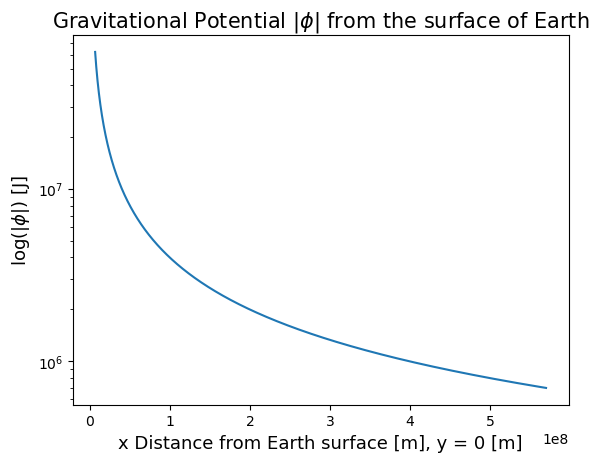

In [239]:
import numpy as np
import matplotlib.pyplot as plt

G = 6.67 * 10**(-11)

#STEP 1
def GPE(xM, yM, M, x, y): #xM, yM = location of mass; x,y = evaluation distance  
    r = np.sqrt((x-xM)**2 + (y-yM)**2)
    pot = -(G*M)/r
    return pot

dist_Em = 3.8 * 10**8 #m (distance between earth and moon)
RE = 6378 *10**3 #m (earth radius)
xvals = np.linspace(RE, 1.5*dist_Em, 10000)
MassE = 5.972 * 10**24 #kg (earth's mass)

#STEP 2
potE = GPE(0, 0, MassE, xvals, 0) #J

fig, ax1 = plt.subplots()
ax1.plot(xvals, np.abs(potE))

ax1.set_yscale('log')
ax1.set_xlabel('x Distance from Earth surface [m], y = 0 [m]', size = '13')
ax1.set_ylabel('$\log(|\phi|)$ [J]', size = '13')
ax1.set_title('Gravitational Potential $|\phi|$ from the surface of Earth', size = '15');

### Question 3:

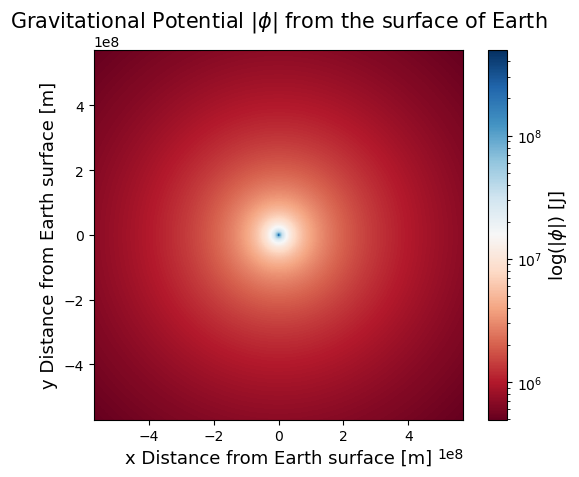

In [6]:
#STEP 3 - color mesh plot
xrange = np.linspace(-1.5*dist_Em, 1.5*dist_Em, 1000) #m
yrange = xrange.copy() #copies x's range #m

#mesh grids
x_grid, y_grid = np.meshgrid(xrange, yrange)

U = GPE(0, 0, MassE, x_grid, y_grid) #J

fig, axcolor = plt.subplots()

#make the plot look square
axcolor.set_aspect('equal')

#add the color bar
#first, capture the output of the plot
import matplotlib.cm as cm
mesh = axcolor.pcolormesh(x_grid, y_grid, np.abs(U), norm = 'log', cmap = cm.RdBu)
cbar = fig.colorbar(mesh)
cbar.set_label('$\log(|\phi|)$ [J]', size = '13')
axcolor.set_xlabel('x Distance from Earth surface [m]', size = '13')
axcolor.set_ylabel('y Distance from Earth surface [m]', size = '13')
axcolor.set_title('Gravitational Potential $|\phi|$ from the surface of Earth', size = '15');

___

## Part 2: The Gravitational Potential of the Earth-Moon System

### Question 1:

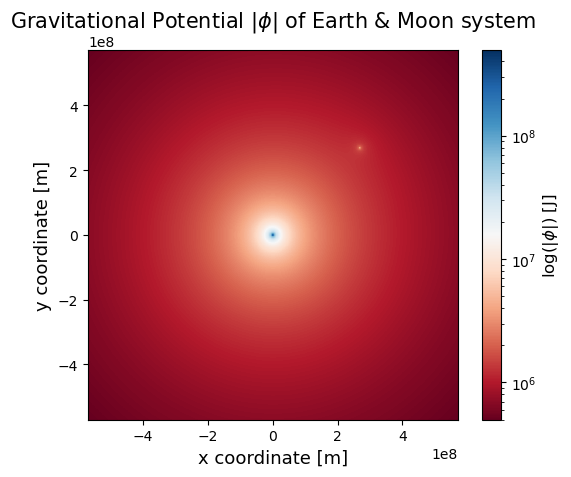

In [76]:
#STEP 1

#Moon location
xm = dist_Em/np.sqrt(2) #m
ym = dist_Em/np.sqrt(2) #m
Massm = 7.3*10**(22) #kg (Moon mass)

#find moon's GPE
potm = GPE(xm, ym, Massm, x_grid, y_grid) #J

#Combined Potential
Utot = U + potm #J

#updated plot
fig, axcolor = plt.subplots()

axcolor.set_aspect('equal')

#add the color bar
#first, capture the output of the plot

mesh = axcolor.pcolormesh(x_grid, y_grid, np.abs(Utot), norm = 'log', cmap = cm.RdBu)
cbar = fig.colorbar(mesh)
cbar.set_label('$\log(|\phi|)$ [J]', size = '12')
axcolor.set_xlabel('x coordinate [m]', size = '13')
axcolor.set_ylabel('y coordinate [m]', size = '13')
axcolor.set_title('Gravitational Potential $|\phi|$ of Earth & Moon system', size = '15');

### Question 2:

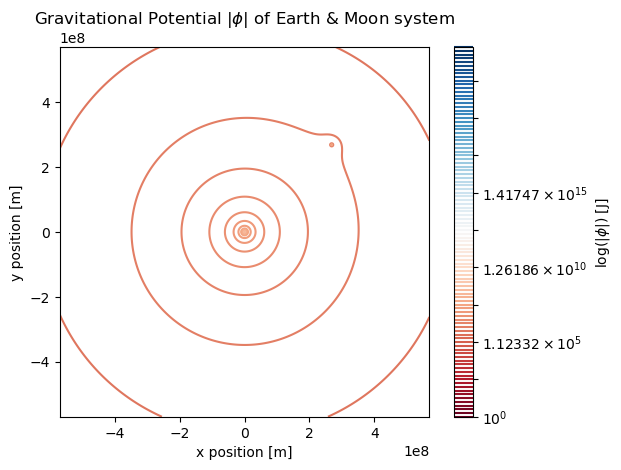

In [10]:
#PART 2 - Make Contour Plot
fig_contour, ax_contour = plt.subplots(1,1)

#adjust levels
lvl = np.logspace(0, 25, 100)

contour = ax_contour.contour(x_grid, y_grid, np.abs(Utot), norm = 'log', levels = lvl, cmap = cm.RdBu)

ax_contour.set_aspect('equal')

cbar = fig.colorbar(contour, location = 'right' )

ax_contour.set_xlabel('x position [m]')
ax_contour.set_ylabel('y position [m]')
cbar.set_label('$\log(|\phi|)$ [J]')
ax_contour.set_title('Gravitational Potential $|\phi|$ of Earth & Moon system');

___

## Part 3: The Gravitational Force Field of the Earth-Moon System

### Question 1:

In [120]:
#M1 = mass of first body
#m2 = mass of second body
#(x1, y1) = cart. coord. of M1
#(x2, y2) = cart. coord of m2

#define the function for gravitational force that M1 exerts on m2
def gForce(M1, m2, x1, y1, x2, y2):
    #if you evaluate it near the charge
    r_squared = np.sqrt((x2 - x1)**2 + (y2 - y1)**2)**2
    vec_r = np.array([x2 - x1, y2 - y1]) #r vector
    vec_r_hat = vec_r / np.linalg.norm(vec_r) #normalize the vector for you? for r-hat (unit vector) linalg = linear algebra
    Fx = np.where(r_squared > 0, -(G*M1*m2) / r_squared * vec_r_hat[0], np.nan) #x component of the field
    Fy = np.where(r_squared > 0, -(G*M1*m2) / r_squared * vec_r_hat[1], np.nan) #y component of the field
    return Fx, Fy

### Question 2:

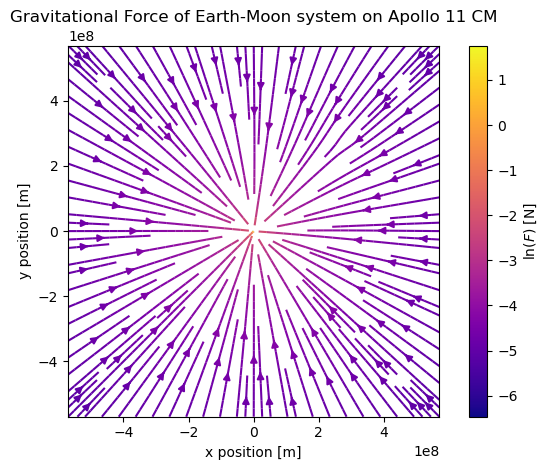

In [231]:
#building the grid over same range (-1.5dist_Em to 1.5dist_Em)
xrange = np.linspace(-1.5*dist_Em, 1.5*dist_Em, 1000) #m
yrange = xrange.copy() #copies x's range #m

MassCM = 5500 #kg 

x_grid, y_grid = np.meshgrid(xrange, yrange)

#Earth influence
FE_x, FE_y = gForce(MassE, MassCM, 0, 0, x_grid, y_grid)

#Moon influence
Fm_x, Fm_y = gForce(Massm, MassCM, xm, ym, x_grid, y_grid)

#add up components
F_x_tot = FE_x + Fm_x #N

F_y_tot = FE_y + Fm_y #N

#colors
colors = np.hypot(F_x_tot, F_y_tot) #colors proportional to the magnitude
import matplotlib.cm as cm

#plot them
fig, ax_stream = plt.subplots()
stream = ax_stream.streamplot(x_grid, y_grid, F_x_tot, F_y_tot, color = np.log(colors), density = 1.5, cmap = 'plasma')
ax_stream.set_aspect('equal')

cbar = fig.colorbar(stream.lines)
cbar.set_label('$\ln (F)$ [N]')

ax_stream.set_xlabel('x position [m]')
ax_stream.set_ylabel('y position [m]')
ax_stream.set_title('Gravitational Force of Earth-Moon system on Apollo 11 CM')
fig.tight_layout()

## Part 4: Altitude of the Saturn V Rocket

### Question 1:

In [241]:
#Calculate burn time T
m0 = 2.8*10**6 #kg - initial "wet" mass (fue, + rocket parts + payload)
mf = 7.5*10**5 #kg - final "dry" mass, when all fuel is burned
mdot = 1.3*10**4 #kg/s - fuel burn rate (constant assumption)
 
T = (m0 - mf)/mdot #sec
print(f'I found a burn time T of ~ {T:0.0f} seconds.')

I found a burn time T of ~ 158 seconds.


### Question 2:

In [187]:
g = 9.81 #m/s^2

def vchange(t, m0, mf, mdot, ve):
    m_t = m0 - (mdot*t)
    delta_v = np.where(m_t > 0, ve*np.log(m0/m_t) - g*t, 0)
    return delta_v

### Question 3: 

In [237]:
from scipy.integrate import quad

ve = 2.4*10**3 #m/s - fuel exhaust velocity

#integrate to find altitude
sum, err = quad(vchange, 0, T, args = (m0, mf, mdot, ve))

h = sum*10**(-3)
h_err = err*10**(-3)

print(f'I found a peak altitude of {h:0.1f} +/- {h_err:0.1} km for the rocket at the end of the burn.') #km

I found a peak altitude of 74.1 +/- 6e-11 km for the rocket at the end of the burn.
